In [1]:
import sys
sys.path.insert(0, '/Volumes/data/LosAlamosSummer')
sys.path.insert(0, '/Volumes/data/LosAlamosSummer/DrOsborneCode')
import src.Utilities as ut
import importlib
import src.models as mod
import src.callbacks as cus
importlib.reload(ut)
importlib.reload(mod)
importlib.reload(cus)
import scipy
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

In [3]:
import pandas as pd

df = pd.read_excel ('/Volumes/data/LosAlamosSummer/Serializationstructures.xlsx')
print (df)
print(df.Sphere)
SS=np.array(df.Sphere[:-1])
print(SS)

            Sphere           LWR           SFR
0     2.615712e+02  1.000000e-03  1.000000e-03
1     5.737464e+02  6.865624e-03  6.865624e-03
2     8.888122e+02  9.160728e-03  9.160728e-03
3     1.195336e+03  1.107134e-02  1.107134e-02
4     1.481597e+03  1.273122e-02  1.273122e-02
...            ...           ...           ...
997   4.267269e+06  7.188363e+06  7.188363e+06
998   4.568146e+06  7.556836e+06  7.556836e+06
999   4.976225e+06  8.021766e+06  8.021766e+06
1000  5.607251e+06  8.701618e+06  8.701618e+06
1001  7.020693e+06           NaN           NaN

[1002 rows x 3 columns]
0       2.615712e+02
1       5.737464e+02
2       8.888122e+02
3       1.195336e+03
4       1.481597e+03
            ...     
997     4.267269e+06
998     4.568146e+06
999     4.976225e+06
1000    5.607251e+06
1001    7.020693e+06
Name: Sphere, Length: 1002, dtype: float64
[2.61571245e+02 5.73746435e+02 8.88812185e+02 ... 4.56814626e+06
 4.97622490e+06 5.60725104e+06]


In [6]:
#datapath = '/Users/jessiejo/data/VBUDS/GroupStructurePaper/NeuralNetworks/All_Libraries/NewDataSetFull1.mat'
datapath='/Volumes/data/LosAlamosSummer/GODIVA/GODIVA_data_0_12.mat'
print('Loading In Data')
kinf,GS=ut.LoadData(datapath,0)
#MakeGroupDensity(X, nDecades)
Nfeatures = 1000;
allData= ut.ProcessData(datapath, 1,1000,1,SS,0)
# allData: (100,000x1,000) y_direct: (100,000x3)
print('Finished Loading Data')

Loading In Data
Finished Loading Data


In [7]:
#!pip install -q -U keras-tuner
print(kinf.shape)
print(len(kinf))

print(kinf.shape)

(50000,)
50000
(50000,)


In [35]:
Nsamples,Ndecades = allData.shape
vldF=.1
testF=.2
normConst=1#np.linalg.norm(kinf)
y_norm=np.array(kinf/normConst)

X, X_test, y, y_test, vldF_corr = ut.makeFractions(Nsamples, vldF, testF, allData, y_norm, 0)


NtrainingSamples = int(Nsamples*(1 - testF))
tranValSplit=int(NtrainingSamples*(1-vldF_corr))
X_train=X[:tranValSplit,:]
y_train=y[:tranValSplit]
X_val=X[tranValSplit+1:,:]
y_val=y[tranValSplit+1:]
print(y_test.shape)
print(y_val.shape)
print(y_norm.shape)
print(y_train.shape)

(9999,)
(4999,)
(50000,)
(35000,)


In [53]:
batch_size=500
model = tf.keras.Sequential([
    layers.Dense(1000, activation='relu', name='hidden_1', input_dim=1000),
    layers.Dense(1000, activation='relu',  name='hidden_2'),
    layers.Dense(1, activation='linear',name='output')])
model.compile(loss="mean_squared_logarithmic_error",metrics="mean_squared_logarithmic_error")
model.build()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
hidden_2 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
output (Dense)               (None, 1)                 1001      
Total params: 2,003,001
Trainable params: 2,003,001
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-3))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-4))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-5))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())
model.compile(loss='MAE',optimizer=tf.keras.optimizers.Adam(1e-6))
model.fit(X_train,y_train.T, epochs=800, batch_size=batch_size, verbose=1,validation_data=(X_val,y_val.T), callbacks=cus.callbacks())

Epoch 1/800
70/70 [==============================] - 2s 32ms/step - loss: 0.1593 - val_loss: 0.0653
Epoch 2/800
70/70 [==============================] - 2s 27ms/step - loss: 0.0528 - val_loss: 0.0425
Epoch 3/800
70/70 [==============================] - 2s 27ms/step - loss: 0.0449 - val_loss: 0.0404
Epoch 4/800
70/70 [==============================] - 2s 28ms/step - loss: 0.0331 - val_loss: 0.0334
Epoch 5/800
70/70 [==============================] - 2s 27ms/step - loss: 0.0283 - val_loss: 0.0288
Epoch 6/800
70/70 [==============================] - 2s 29ms/step - loss: 0.0225 - val_loss: 0.0281
Epoch 7/800
70/70 [==============================] - 2s 28ms/step - loss: 0.0199 - val_loss: 0.0234
Epoch 8/800
70/70 [==============================] - 2s 28ms/step - loss: 0.0170 - val_loss: 0.0195
Epoch 9/800
70/70 [==============================] - 2s 28ms/step - loss: 0.0147 - val_loss: 0.0170
Epoch 10/800
70/70 [==============================] - 2s 28ms/step - loss: 0.0123 - val_loss: 0.0162

70/70 [==============================] - 2s 34ms/step - loss: 0.0030 - val_loss: 0.0060
Epoch 83/800
70/70 [==============================] - 2s 34ms/step - loss: 0.0030 - val_loss: 0.0055
Epoch 84/800
70/70 [==============================] - 2s 33ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 85/800
70/70 [==============================] - 2s 33ms/step - loss: 0.0032 - val_loss: 0.0057
Epoch 86/800
70/70 [==============================] - 2s 33ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 87/800
70/70 [==============================] - 2s 33ms/step - loss: 0.0031 - val_loss: 0.0059
Epoch 88/800
70/70 [==============================] - 2s 34ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 89/800
70/70 [==============================] - 2s 34ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 90/800
70/70 [==============================] - 2s 35ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 91/800
70/70 [==============================] - 2s 34ms/step - loss: 0.0029 - val_loss: 0.0057
Epo

70/70 [==============================] - 3s 45ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 163/800
70/70 [==============================] - 3s 47ms/step - loss: 0.0026 - val_loss: 0.0048
Epoch 164/800
70/70 [==============================] - 3s 47ms/step - loss: 0.0025 - val_loss: 0.0049
Epoch 165/800
70/70 [==============================] - 3s 48ms/step - loss: 0.0025 - val_loss: 0.0049
Epoch 166/800
70/70 [==============================] - 3s 45ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 167/800
70/70 [==============================] - 3s 47ms/step - loss: 0.0024 - val_loss: 0.0052
Epoch 168/800
70/70 [==============================] - 3s 44ms/step - loss: 0.0023 - val_loss: 0.0048
Epoch 169/800
70/70 [==============================] - 3s 42ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 170/800
70/70 [==============================] - 3s 43ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 171/800
70/70 [==============================] - 3s 41ms/step - loss: 0.0025 - val_loss: 0

In [60]:
y_predicted = model.predict(X_test)
metric = tf.keras.metrics.MeanSquaredError(name="mean_average_error", dtype=None)
metric.update_state(np.array(y_predicted),np.array(y_test.T))
metric.result().numpy()

5.1570583e-05

In [69]:
a = (y_predicted[:,0]-y_test)
print(y_predicted.shape)
print(y_test.shape)
print(a.shape)

(9999, 1)
(9999,)
(9999,)


(9999,)


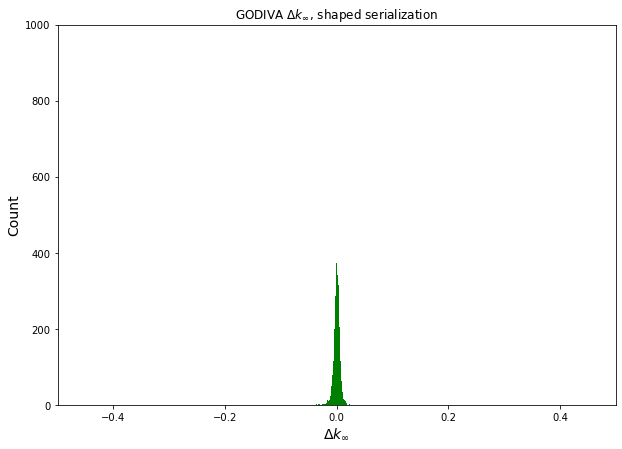

In [96]:
# Creating dataset
print(a.shape)
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a,bins=500,label="BOL",color='g')
plt.xlabel("$Δk_{\infty}$", size=14)
plt.ylabel("Count", size=14)
plt.title("GODIVA $Δk_{\infty}$, shaped serialization")
#plt.legend(loc='upper right')
plt.xlim([-0.5,0.5])
plt.ylim([0,1000])

plt.savefig("/Volumes/data/LosAlamosSummer/All_Results/GODIVA/GODIVA_deltaK_fluxShaped12.png",bbox_inches ="tight",
            pad_inches = 1,
            transparent = False,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
# Show plot
plt.show()


In [71]:
print(np.std(y_test.T))
print(np.std(a))
print(np.mean(y_test.T))
print(np.mean(y_predicted))
print(len(y_test))
print(len(y_predicted))
print(len(a))


0.06737911895538316
0.0071792309360641715
1.0796179340080996
1.079447
9999
9999
9999


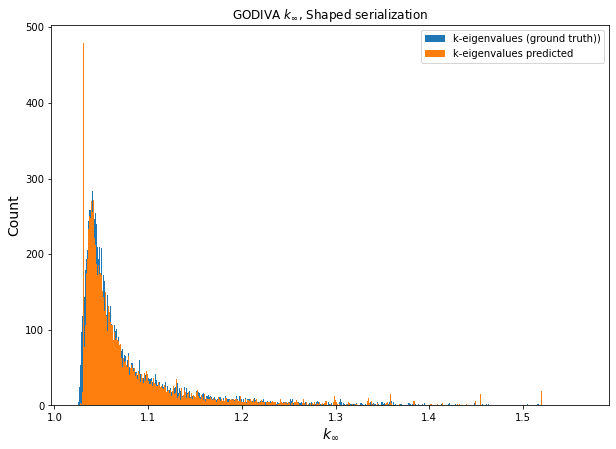

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
 

n_bins = 500
 

# Creating histogram
fig, axs = plt.subplots(figsize =(10, 7))
 
axs.hist(y_test.T*normConst, bins = n_bins,label="k-eigenvalues (ground truth))")
axs.hist(y_predicted*normConst, bins = n_bins,label="k-eigenvalues predicted")


plt.xlabel("$k_{\infty}$", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

plt.title("GODIVA $k_{\infty}$, Shaped serialization ")
plt.savefig("/Volumes/data/LosAlamosSummer/All_Results/GODIVA/kinfDist_fluxShaped_12.png",bbox_inches ="tight",
            pad_inches = 1,
            transparent = False,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')

plt.show()
# Show plot

